In [1]:
from scipy.signal import lfilter
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from statistics import mean
from scipy import integrate
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import statistics
import copy
from pandas import *

In [2]:
# this is for velocity

In [3]:
## acc voltage to real units conversion factor
## [y1,x1,z1, y2,x2,z2]
conv_12 = [0.00601427, 0.0059633, 0.0059633, 0.00606523, 0.00606523, 0.0059633]
conv_57  = [0.0328, 0.0325, 0.0322, 0.0324, 0.0328, 0.0327]

In [4]:
def pack(import_file_name, col_list, conv): # pack csv data to arrays 
    # import data using pandas
    col = ['Time', 'Channel A', 'Channel B', 'Channel C','Channel E','Channel F','Channel G'] # define columns
    data_pd = pd.read_csv(import_file_name, usecols = col_list)   # array in pandas
    # create empty output data pack 
    # data structure: [time, channel_a, channel_b, channel_c,...]
    output_datapack = np.linspace(0,0,np.size(col_list)).tolist()
    # conversion to str list
    for i in range(np.size(col_list)):
        output_datapack[i] = data_pd[col[i]][1:].tolist() 
        if i == 0: # time
            output_datapack[i] = [float("{0:.6f}".format(float(j)*1000)) for j in output_datapack[i]] # convert to float
        else:
            output_datapack[i] = [float(j) for j in output_datapack[i]]
            zero = mean(output_datapack[i][20:200]) # baseline for shifting and aligning "zero" accelerations to zero
            output_datapack[i] = [float(j-zero)/conv[i-1] for j in output_datapack[i]] # voltage to acceleration conversion
            #output_datapack[i] = [abs(j) for j in output_datapack[i]] # making all channel abs 
#             index = find_onset(output_datapack[i])
#             output_datapack[i][0:index] = np.linspace(0,0,index)
    return output_datapack

def align(data, time_cutoff):
    time_cutoff = [t for t in time_cutoff for _ in range(2)] # extend array 
    for i in range(np.shape(data)[0]):
        data[i][0] = [t - time_cutoff[i] for t in data[i][0]] # make time adjustment s.t. time is shifted to impact time
        data[i][0] = [float("{:.2f}".format(t)) for t in data[i][0] if t >= 0] # pop out negative values 
        data[i][0] = [float("{:.2f}".format(t-data[i][0][0])) for t in data[i][0]] # make sure impact time is zero
        for j in range(1,np.shape(data)[1]):
            data[i][j] = data[i][j][(len(data[i][j])-len(data[i][0])):] # align acc values 
    return data

def integrate_accel(channel, Time):
    velocity = np.zeros(np.size(Time)).tolist()
    running_sum = 0
    for i in range(np.size(Time)-1):
        dv = 0.5*((channel[i])+(channel[i+1]))*((Time[i+1]-Time[i])/1000)
        running_sum += dv
        velocity[i] = running_sum
        velocity[i+1] = running_sum
    return velocity

def integrate(data):
    velocity = copy.deepcopy(data)
    for i in range(np.shape(data)[0]):
        for j in range(1,np.shape(data)[1]):
            velocity[i][j] = integrate_accel(data[i][j][0:2000],data[i][0][0:2000])
            velocity[i][0] = velocity[i][0][0:2000]
    return velocity 

In [5]:
a20z5 = [] # with [c,f,c,f,c,f] & [[d,u],[d,u],...]
a40z5 = []
a60z5 = []
a20z7 = [] # with [c,f,c,f,c,f] & [[d,u],[d,u],...]
a40z7 = []
a60z7 = []
a20z3 = [] # with [c,f,c,f,c,f] & [[d,u],[d,u],...]
a40z3 = []
a60z3 = []
pack_list20 = [73,74,75]
pack_list40 = [64,65,66]
pack_list60 = [55,56,57]
for i in range(len(pack_list20)):
    a20z5.append(pack('t'+str(pack_list20[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a20z5.append(pack('t'+str(pack_list20[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a40z5.append(pack('t'+str(pack_list40[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a40z5.append(pack('t'+str(pack_list40[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a60z5.append(pack('t'+str(pack_list60[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a60z5.append(pack('t'+str(pack_list60[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
pack_list20 = [76,77,78]
pack_list40 = [67,68,69]
pack_list60 = [58,59,60]
for i in range(len(pack_list20)):
    a20z7.append(pack('t'+str(pack_list20[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a20z7.append(pack('t'+str(pack_list20[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a40z7.append(pack('t'+str(pack_list40[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a40z7.append(pack('t'+str(pack_list40[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a60z7.append(pack('t'+str(pack_list60[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a60z7.append(pack('t'+str(pack_list60[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
pack_list20 = [79,80,81]
pack_list40 = [70,71,72]
pack_list60 = [61,62,63]
for i in range(len(pack_list20)):
    a20z3.append(pack('t'+str(pack_list20[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a20z3.append(pack('t'+str(pack_list20[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a40z3.append(pack('t'+str(pack_list40[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a40z3.append(pack('t'+str(pack_list40[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
    a60z3.append(pack('t'+str(pack_list60[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
    a60z3.append(pack('t'+str(pack_list60[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater

/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_1525/3610897513.py:14: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  a20z5.append(pack('t'+str(pack_list20[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_1525/3610897513.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  a20z5.append(pack('t'+str(pack_list20[i])+'f.csv', [0,1,2,3,4,5,6], conv_57)) # for further from crater
/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_1525/3610897513.py:16: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  a40z5.append(pack('t'+str(pack_list40[i])+'c.csv', [0,1,2,3,4,5,6], conv_12)) # for near crater
/var/folders/hv/gy77k6wd7xj8h6rn0b0xrn5c0000gn/T/ipykernel_1525/3610897513.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6)

In [6]:
t_off = [599.82,595.67,588.81]
a20z5 = align(a20z5,t_off)
t_off = [575.88,577.95,581.78]
a40z5 = align(a40z5,t_off)
t_off = [591.04,576.36,573.17]
a60z5 = align(a60z5,t_off)

t_off = [581.31,577.63,578.91]
a20z7 = align(a20z7,t_off)
t_off = [587.69,582.90,573.01]
a40z7 = align(a40z7,t_off)
t_off = [569.81,577.00,583.06]
a60z7 = align(a60z7,t_off)

t_off = [582.10,594.71,594.39]
a20z3 = align(a20z3,t_off)
t_off = [575.08,577.32,587.69]
a40z3 = align(a40z3,t_off)
t_off = [592.80,592.16,601.10]
a60z3 = align(a60z3,t_off)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [7]:
a20z5 = integrate(a20z5)
a40z5 = integrate(a40z5)
a60z5 = integrate(a60z5)

a20z7 = integrate(a20z7)
a40z7 = integrate(a40z7)
a60z7 = integrate(a60z7)

a20z3 = integrate(a20z3)
a40z3 = integrate(a40z3)
a60z3 = integrate(a60z3)

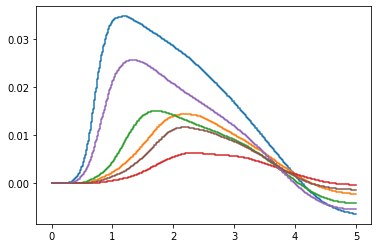

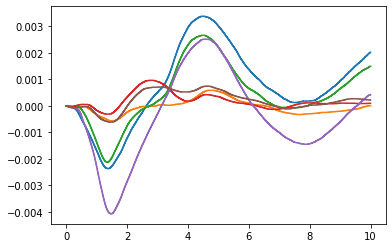

In [8]:
for i in range(np.shape(a20z5)[0]):
    plt.plot(a60z5[i][0][0:1000],a60z5[i][2][0:1000])
plt.show()

for i in range(np.shape(a20z5)[0]):
    plt.plot(a20z7[i][0],a20z7[i][1])
plt.show()

In [9]:
# now compute v_r in radial 
a20z5r_d = []
a20z5r_u = []
a40z5r_d = []
a40z5r_u = []
a60z5r_d = []
a60z5r_u = []

a20z7r_d = []
a20z7r_u = []
a40z7r_d = []
a40z7r_u = []
a60z7r_d = []
a60z7r_u = []

a20z3r_d = []
a20z3r_u = []
a40z3r_d = []
a40z3r_u = []
a60z3r_d = []
a60z3r_u = []

for i in range(np.shape(a20z5)[0]):
    a20z5r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a20z5[i][2],a20z5[i][1])])
    a20z5r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a20z5[i][4],a20z5[i][5])])
    a40z5r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a40z5[i][2],a40z5[i][1])])
    a40z5r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a40z5[i][4],a40z5[i][5])])
    a60z5r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a60z5[i][2],a60z5[i][1])])
    a60z5r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a60z5[i][4],a60z5[i][5])])
    
    a20z7r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a20z7[i][2],a20z7[i][1])])
    a20z7r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a20z7[i][4],a20z7[i][5])])
    a40z7r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a40z7[i][2],a40z7[i][1])])
    a40z7r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a40z7[i][4],a40z7[i][5])])
    a60z7r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a60z7[i][2],a60z7[i][1])])
    a60z7r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a60z7[i][4],a60z7[i][5])])
    
    a20z3r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a20z3[i][2],a20z3[i][1])])
    a20z3r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a20z3[i][4],a20z3[i][5])])
    a40z3r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a40z3[i][2],a40z3[i][1])])
    a40z3r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a40z3[i][4],a40z3[i][5])])
    a60z3r_d.append([np.sqrt(x**2+y**2) for x,y in zip(a60z3[i][2],a60z3[i][1])])
    a60z3r_u.append([np.sqrt(x**2+y**2) for x,y in zip(a60z3[i][4],a60z3[i][5])])
    


In [10]:
def r(R,z):
    theta = np.arctan(z/R)
    Rr = np.sin(theta) * np.cos(0)
    zr = np.sin(theta) * np.sin(0)
    return R*Rr + z*zr

In [11]:
a20z5rpk_d = []
a20z5rpk_u = []
a40z5rpk_d = []
a40z5rpk_u = []
a60z5rpk_d = []
a60z5rpk_u = []

a20z7rpk_d = []
a20z7rpk_u = []
a40z7rpk_d = []
a40z7rpk_u = []
a60z7rpk_d = []
a60z7rpk_u = []


a20z3rpk_d = []
a20z3rpk_u = []
a40z3rpk_d = []
a40z3rpk_u = []
a60z3rpk_d = []
a60z3rpk_u = []

for i in range(np.shape(a20z5r_d)[0]):
    a20z5rpk_d.append(max(a20z5r_d[i]))
    a40z5rpk_d.append(max(a40z5r_d[i]))
    a60z5rpk_d.append(max(a60z5r_d[i]))
    a20z5rpk_u.append(max(a20z5r_u[i]))
    a40z5rpk_u.append(max(a40z5r_u[i]))
    a60z5rpk_u.append(max(a60z5r_u[i]))
    
    a20z7rpk_d.append(max(a20z7r_d[i]))
    a40z7rpk_d.append(max(a40z7r_d[i]))
    a60z7rpk_d.append(max(a60z7r_d[i]))
    a20z7rpk_u.append(max(a20z7r_u[i]))
    a40z7rpk_u.append(max(a40z7r_u[i]))
    a60z7rpk_u.append(max(a60z7r_u[i]))
    
    a20z3rpk_d.append(max(a20z3r_d[i]))
    a40z3rpk_d.append(max(a40z3r_d[i]))
    a60z3rpk_d.append(max(a60z3r_d[i]))
    a20z3rpk_u.append(max(a20z3r_u[i]))
    a40z3rpk_u.append(max(a40z3r_u[i]))
    a60z3rpk_u.append(max(a60z3r_u[i]))

In [12]:
def power_law(x, a, b):
    return a*x**b
def fit(x,y,angle,color,num):
    popt, pcov = curve_fit(power_law, x, y)
    xnew = np.linspace(5, 14, 100)
    stdevs = np.sqrt(np.diag(pcov))
    ar = pcov[0,0]**0.5
    br = pcov[1,1]**0.5
    axs[num].plot(xnew, power_law(xnew, *popt), '--', color=color, linewidth = 2.5, \
             label='('+str(round(popt[0], 1))+\
                  r"$\pm{%.1f}$"%(round(ar,1))+')'\
                  +r"$r^{%.1f}$"%(round(popt[1],1))+r"$^{\pm{%.1f}}$"%(round(br,1)))
    axs[num].legend(fontsize="10",labelspacing = 0.05,loc=3)
    print(str(angle)+':'+str(pcov)+str(popt))

In [13]:
down20 = a20z3rpk_d+a20z5rpk_d+a20z7rpk_d
up20 = a20z3rpk_u+a20z5rpk_u+a20z7rpk_u

down40 = a40z3rpk_d+a40z5rpk_d+a40z7rpk_d
up40 = a40z3rpk_u+a40z5rpk_u+a40z7rpk_u

down60 = a60z3rpk_d+a60z5rpk_d+a60z7rpk_d
up60 = a60z3rpk_u+a60z5rpk_u+a60z7rpk_u
R = [6,10,8,12,7,11] # z = -5 
r3 = [np.sqrt(i**2 + 3**2) for i in R]
r5 = [np.sqrt(i**2 + 5**2) for i in R]
r7 = [np.sqrt(i**2 + 7**2) for i in R]
r = r3+r5+r7
r1 = r3+r5+r7 # pop outlier
index = r1.index(max(r1))
r1.pop(index)
up20.pop(index)

0.00549199367932915

20:[[37.41160251 -2.01071385]
 [-2.01071385  0.10880818]][ 8.89701256 -3.10358026]
20:[[ 4.01593461 -0.82756865]
 [-0.82756865  0.17172192]][ 2.30920708 -2.90633827]
40:[[ 5.67620574 -0.35771814]
 [-0.35771814  0.02271397]][ 7.48891604 -2.69905935]
40:[[ 1.26729147 -0.32433746]
 [-0.32433746  0.08366417]][ 1.83016771 -2.47704417]
60:[[30.11284787 -1.10863408]
 [-1.10863408  0.04111011]][12.90271086 -2.89730521]
60:[[ 1.6781776  -0.19907686]
 [-0.19907686  0.02379442]][ 3.97807588 -2.69588004]


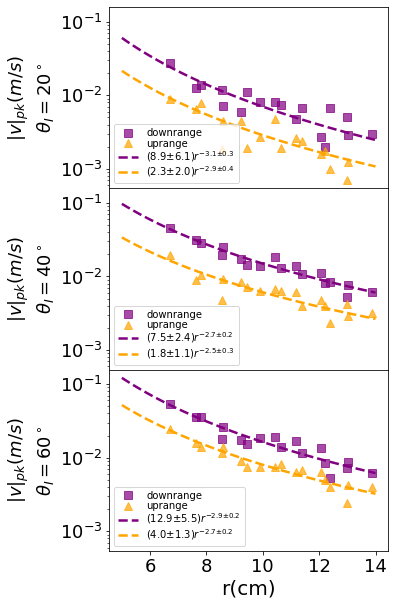

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(5, 10),sharex=True, sharey=True)
gs = fig.add_gridspec(3, 1, hspace=0, wspace=0)
axs = axs.flatten()

diff20 = [(j/i)**2 for i,j in zip(down20[0:17],up20)]
diff40 = [(j/i)**2 for i,j in zip(down40,up40)]
diff60 = [(j/i)**2 for i,j in zip(down60,up60)]

# axs[0].plot(r1,diff20,'o',alpha=0.6,label=r"$\Delta v_{r,pk}$")
# axs[1].plot(r,diff40,'o',alpha=0.6,label=r"$\Delta v_{r,pk}$")
# axs[2].plot(r,diff60,'o',alpha=0.6,label=r"$\Delta v_{r,pk}$")

axs[0].plot(r,down20,'s',color='purple',markersize=8,alpha=0.7,label='downrange')
axs[0].plot(r1,up20,'^',color='orange',markersize=8,alpha=0.7,label='uprange')
axs[1].plot(r,down40,'s',color='purple',markersize=8,alpha=0.7,label='downrange')
axs[1].plot(r,up40,'^',color='orange',markersize=8,alpha=0.7,label='uprange')
axs[2].plot(r,down60,'s',color='purple',markersize=8,alpha=0.7,label='downrange')
axs[2].plot(r,up60,'^',color='orange',markersize=8,alpha=0.7,label='uprange')

fit(r,down20,20,'purple',0)
fit(r1,up20,20,'orange',0)
fit(r,down40,40,'purple',1)
fit(r,up40,40,'orange',1)
fit(r,down60,60,'purple',2)
fit(r,up60,60,'orange',2)
plt.yscale("log")
axs[0].tick_params(labelsize=18)
axs[1].tick_params(labelsize=18)
axs[2].tick_params(labelsize=18)

axs[0].set_ylabel(r"$|v|_{pk}(m/s)$"+'\n'+r"$\theta_I = 20^\circ$",fontsize=18)
axs[1].set_ylabel(r"$|v|_{pk}(m/s)$"+'\n'+r"$\theta_I = 40^\circ$",fontsize=18)
axs[2].set_ylabel(r"$|v|_{pk}(m/s)$"+'\n'+r"$\theta_I = 60^\circ$",fontsize=18)

axs[2].set_xlabel('r(cm)',fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('vfit.png', dpi=500, bbox_inches='tight')